In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 图片单独显示
# %matplotlib qt
# 图片嵌入到单元格中
%matplotlib inline

In [3]:
# 导入数据
file_path = "E:\\code\\jupyter\\data_analysis\\pandas\\demos\\订单销售数据分析\\order.csv"
df = pd.read_csv(file_path)
df.head()

,订单日期,年份,订单数量,产品ID,客户ID,交易类型,销售区域ID,销售大区,国家,区域,产品类别,产品型号名称,产品名称,产品成本,利润,单价,销售金额
0,2016/1/1,2016,1,528,14432BA,1,4,西南区,中国,大中华区,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
1,2016/1/2,2016,1,528,18741BA,1,4,西南区,中国,大中华区,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
2,2016/1/2,2016,1,528,27988BA,1,4,西南区,中国,大中华区,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
3,2016/1/5,2016,1,528,25710BA,1,4,西南区,中国,大中华区,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
4,2016/1/6,2016,1,528,14999BA,1,4,西南区,中国,大中华区,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0


In [4]:
# 删除重复值
df.drop_duplicates(inplace=True)

In [5]:
# 查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60391 entries, 0 to 60397
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单日期    60391 non-null  object 
 1   年份      60391 non-null  int64  
 2   订单数量    60391 non-null  int64  
 3   产品ID    60391 non-null  int64  
 4   客户ID    60391 non-null  object 
 5   交易类型    60391 non-null  int64  
 6   销售区域ID  60391 non-null  int64  
 7   销售大区    60391 non-null  object 
 8   国家      60391 non-null  object 
 9   区域      60391 non-null  object 
 10  产品类别    60391 non-null  object 
 11  产品型号名称  60391 non-null  object 
 12  产品名称    60391 non-null  object 
 13  产品成本    60391 non-null  float64
 14  利润      60391 non-null  float64
 15  单价      60391 non-null  float64
 16  销售金额    60391 non-null  float64
dtypes: float64(4), int64(5), object(8)
memory usage: 8.3+ MB


In [6]:
# 按照年份统计销售额，降序输出
# df["订单日期"] = pd.to_datetime(df["订单日期"])
# df_year_sales = df.groupby(df["订单日期"].dt.year)["销售金额"].sum().round(2)
# df_year_sales.sort_values(ascending=False)

df_year_sales = df.groupby("年份")["销售金额"].sum().sort_values(ascending=False)
df_year_sales

年份
2016    22390338.42
2015    16063868.36
2014      182951.85
2013      106308.27
Name: 销售金额, dtype: float64

In [7]:
# 任务2: 按月度统计销售数量
# 转换数据类型并提取销售月份
df["订单日期"] = pd.to_datetime(df["订单日期"])
df["销售月份"] = df["订单日期"].dt.to_period("M").astype(str)

      销售月份  销售数量
0  2013-07   146
1  2013-08   156
2  2013-09   146
3  2013-10   161
4  2013-11   169
销售月份    2016-06
销售数量       5544
Name: 35, dtype: object


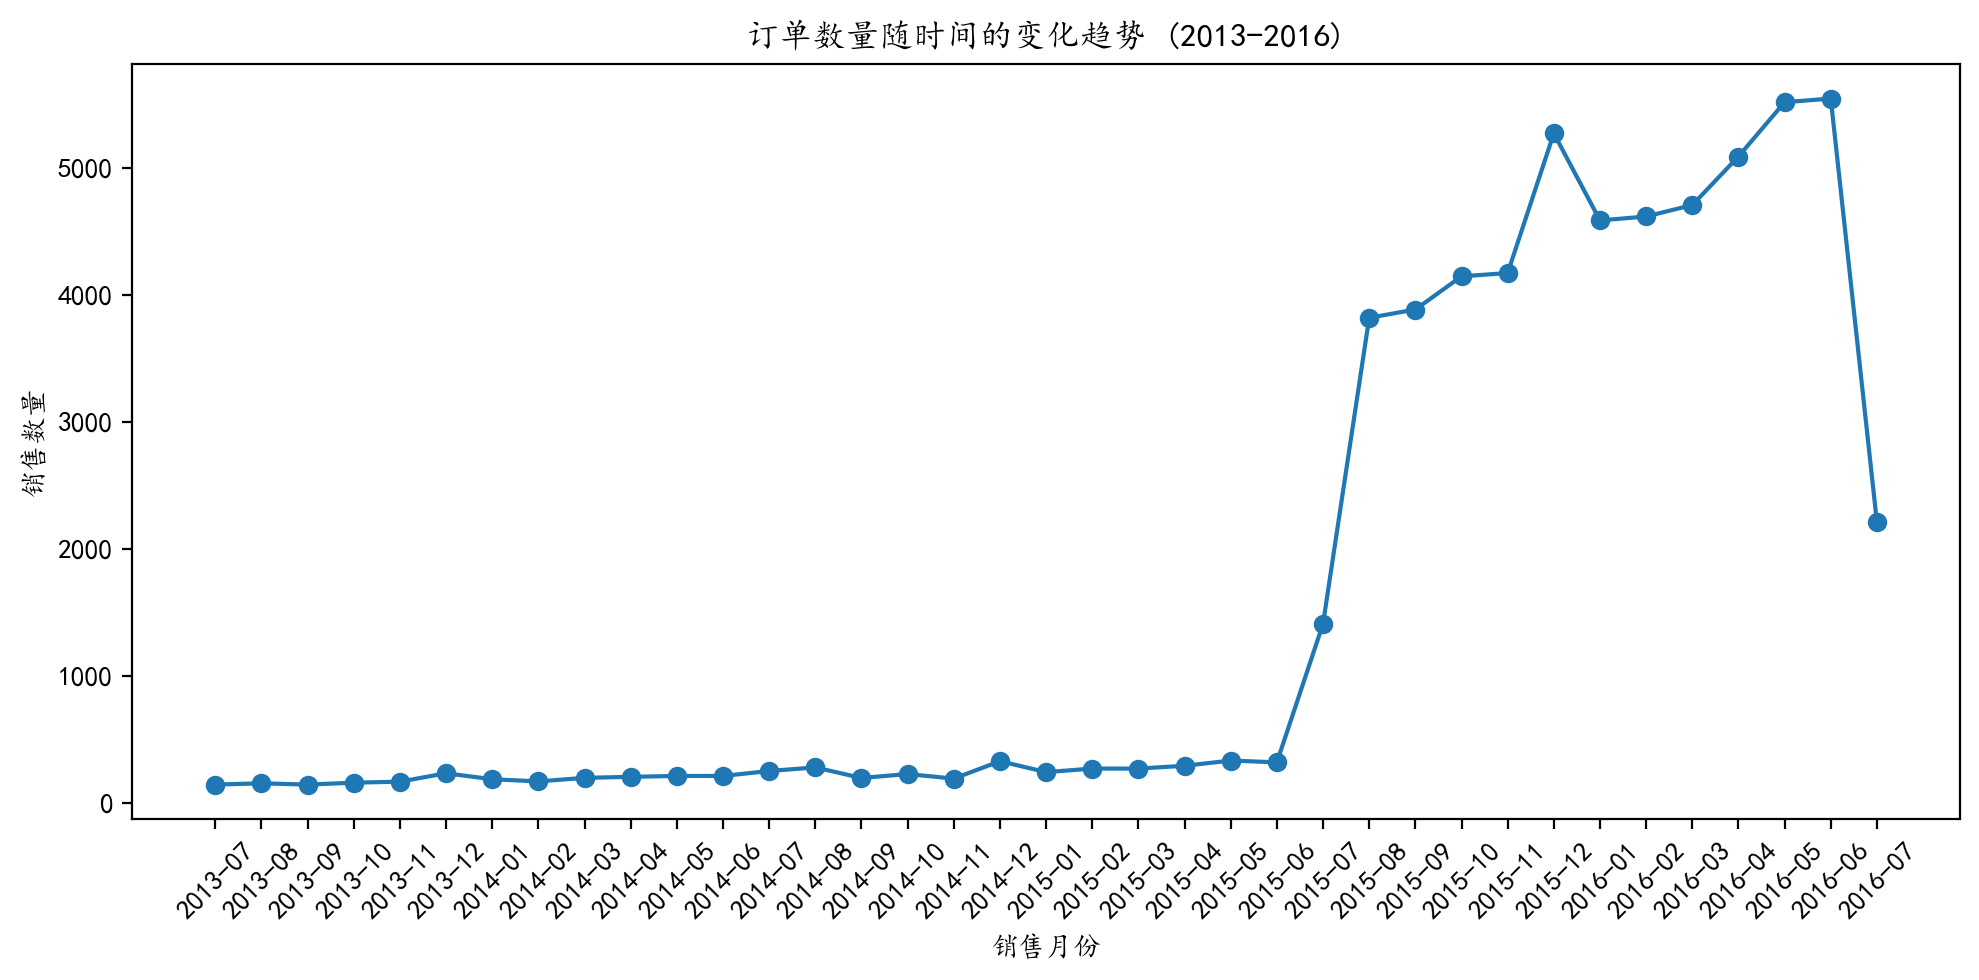

In [8]:
# 按月份聚合
df_month_orders = df.groupby("销售月份").size().reset_index(name="销售数量")
print(df_month_orders.head())
max_month = df_month_orders.loc[df_month_orders["销售数量"].idxmax()]
print(max_month)

# 支持中文
plt.rcParams['font.sans-serif'] = ['KaiTi'] 
# 解决负号显示成方块的问题
plt.rcParams['axes.unicode_minus'] = False     

# 趋势图
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(df_month_orders["销售月份"], df_month_orders["销售数量"], marker="o")
plt.xticks(rotation=45)
plt.title("订单数量随时间的变化趋势 (2013-2016)")
plt.xlabel("销售月份")
plt.ylabel("销售数量")
plt.grid(False)
plt.tight_layout()
plt.show()

In [9]:
# 任务3: 统计2016年各个国家的订单数量，销售额
df_2016_year = df[df["年份"] == 2016]
df_2016_year.groupby("国家")[["订单数量", "销售金额", "利润"]].sum().round(2)

,订单数量,销售金额,利润
国家,,,
中国,11631,8127428.30,3525236.48
中国台湾,3579,2361700.11,969703.64
中国澳门,6757,4361739.64,1783523.75
中国香港,3061,1976666.78,803100.02
新加坡,2975,2083231.41,838558.78
韩国,4260,3479572.18,1538321.46


In [10]:
# 任务4: 统计不同产品的订单数量，并输出不同类别产品订单数量最多的前3中产品
# df_different_goods = (
#     df.groupby(["产品类别", "产品名称"])["订单数量"]
#     .sum()
#     .groupby(level=0, group_keys=False)
#     .apply(lambda x: x.sort_values(ascending=False).head(3).index.get_level_values(1).tolist())
# )

df_different_goods = (
    df.groupby(["产品类别", "产品名称"])["订单数量"]
    .sum()
    .groupby(level=0, group_keys=False)
    .apply(lambda x : x.nlargest(3))
)
df_different_goods

产品类别  产品名称  
服装    棒球服        3332
      帽子         2190
      击打手套       1430
球     硬式棒球       8068
      软式棒球       4970
      垒球         2167
配件    棒球手套      17327
      球棒与球棒袋     7980
      头盔         6439
Name: 订单数量, dtype: int64

In [11]:
# 任务5: 统计面向中国的订单和利润每个月的情况以及同比增长和环比增长
df_China = df[df["国家"] == "中国"].groupby("销售月份")[["订单数量", "利润"]].sum().round(2)
df_China["订单数量环比增长率"] = (df_China["订单数量"].pct_change() * 100).round(2).astype(str) + "%"
df_China["利润环比增长率"] = (df_China["利润"].pct_change() * 100).round(2).astype(str) + "%"
df_China["订单数量同比增长率"] = (df_China["订单数量"].pct_change(12) * 100).round(2).astype(str) + "%"
df_China["利润同比增长率"] = (df_China["利润"].pct_change(12) * 100).round(2).astype(str) + "%"
df_China

,订单数量,利润,订单数量环比增长率,利润环比增长率,订单数量同比增长率,利润同比增长率
销售月份,,,,,,
2013-07,41,1710.00,nan%,nan%,nan%,nan%
2013-08,43,1890.00,4.88%,10.53%,nan%,nan%
2013-09,50,2160.00,16.28%,14.29%,nan%,nan%
2013-10,56,2380.00,12.0%,10.19%,nan%,nan%
2013-11,60,2640.00,7.14%,10.92%,nan%,nan%
2013-12,91,3930.00,51.67%,48.86%,nan%,nan%
2014-01,67,2810.00,-26.37%,-28.5%,nan%,nan%
2014-02,34,1300.00,-49.25%,-53.74%,nan%,nan%
2014-03,73,3170.00,114.71%,143.85%,nan%,nan%


In [ ]:
# 统计16年中国订单数量和利润最高的销售大区
df_China_2016 = df[(df["国家"] == "中国") & (df["年份"] == 2016)]
max_area = df_China_2016.groupby("销售大区")[["订单数量", "利润"]].sum().round(2).sort_values(by=["订单数量", "利润"], ascending=[False, False]).idxmax()
print(f"订单数量最多的区是：{max_area["订单数量"]}, 利润最高的大区是：{max_area["利润"]}")
# print(df_China_2016.groupby(["销售大区", "产品类别"])["订单数量"].sum().groupby(level=0, group_keys=False).apply(lambda x : x.nlargest(1)))
# print(df_China_2016.groupby(["销售大区", "产品类别"])["订单数量"].sum().groupby(level=0, group_keys=False).apply(lambda x : x.nsmallest(1)))

max_inner = df_China_2016.groupby(["销售大区", "产品类别"])["订单数量"].sum().groupby(level=0).idxmax().map(lambda x : x[1]).reset_index().rename(columns={"订单数量":"销售最多的类别"})
max_inner
min_inner = df_China_2016.groupby(["销售大区", "产品类别"])["订单数量"].sum().groupby(level=0).idxmin().map(lambda x : x[1]).reset_index().rename(columns={"订单数量":"销售最少的产品类别"})
min_inner

sales_info = pd.merge(max_inner, min_inner, on="销售大区")
sales_info

订单数量最多的区是：西南区, 利润最高的大区是：西南区


,销售大区,销售最多的类别,销售最少的产品类别
0,东北区,配件,球
1,东南区,配件,球
2,中部,配件,服装
3,西北区,配件,球
4,西南区,配件,服装
